# 1. CNN Visualization

#### 2014 Zeiler and Fergus의 논문
- 낮은 계층에서는 가로/세로 무늬, 동그란 형태의 물체 등 보다 구체적인 방향성에 대한 정보를 담고있는 필터
- 높은 계층으로 갈수록 보다 추상적이고 의미론적인 정보를 담고있는 필터

## filter weight visualization
- 가장 간단한 방법
예제)
- AlexNet의 첫 번째 conv. layer의 filter는 11x11x3의 사이즈를 가지기 때문에 color image로 시각화할 수 있음
- 영상처럼 각 필터를 띄워보면 다양한 operation이 학습되었다는것을 볼 수 있음
- activation을 취한 뒤 시각화한 결과도 확인
    - Channel size가 1이기 때문에 흑백 이미지로 시각화
    - 필터의 특성에 따라 45도 대각에 대한 성분을 강하게 검출하거나 자잘한 디테일에 집중하는 것을 확인
    
    
=> 사람은 3차원을 초과하는 차원에 대해서 해석이 불가하기 때문에 이 이상의 filter는 확인하지 않음

### Neural Network 를 분석하기 위한 Visualize 
- 모델에 중점 or 데이터에 중점
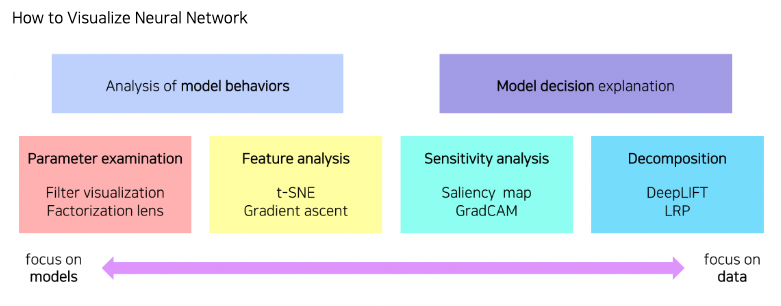

# 2. Analysis of model behaviors (시각화 방법)

### Embedding Feature Analysis_1
- 예제 이미지를 통해 시각화하는 방법
- Nearest-Neighbor 방식을 활용
- DB가 존재 -> DB내부에 분석을 위한 예제 dataset을 저장 -> 질의데이터가 들어오면 DB내의 유사한 영상을 찾기 위해 검색 -> 거리에 따라 유사한 데이터 정렬


=> 의미론적으로 유사한 이미지끼리 군집을 이루고 있다는 것을 확인

#### 동작원리
- 미리 학습된 Neural Network를 준비
- 가장 마지막에서 2번째 FC레이어에서 feature를 추출할 수 있도록 준비
- 쿼리 영상을 대입 -> 특징을 추출 -> 고차원 공간 어딘가 위치에 저장 (DB의 모든 데이터에 대해) + 좌표 결과를 DB에 저장 
- 질의 영상을 대입 -> 특징을 뽑아냄
- 특징과 거리가 가까운 영상들을 찾아서 return 


=> 전체적인 그림을 파악하기 어려운 단점이 존재

### Embedding Feature Analysis_2
- 고차원 벡터를 저차원으로 변환해 표현하는 방법(차원축소)

#### 예제 t-SNE
- 0-9까지의 숫자 이미지로 구성된 MNIST 데이터의 특징 벡터를 t-SNE를 사용하여 저차원 벡터로 mapping한 결과
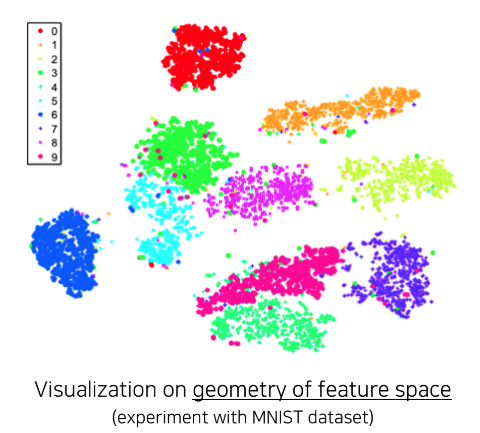

### Activation Investigation1

-  layer의 activation을 분석하여 모델의 특성을 파악하는 방법

예제
- 각각 AlexNet conv5 layer의 138번째 채널, 53번째 채널의 activation을 적절한 값으로 thresholding하여 mask를 만들고, 원본 이미지에 overlay해 결과를 얻음
- 각 activation 채널이 hidden node들의 역할
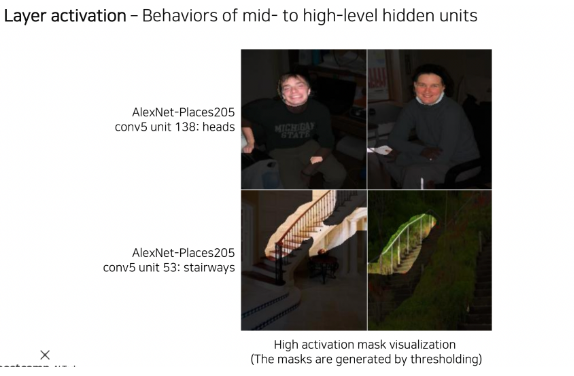

### Activation Investigation2

- layer activation에서 가장 큰 값을 가지는 patch의 위치를 기반으로 분석
- 구체적으로 이미지를 입력시켜 특정 레이어의 activation map을 구하고, activation map에서 가장 큰 값을 가지는 patch의 위치 정보를 저장
- 입력한 이미지에서 그 위치에 해당하는 부분을 잘라서 확인해보면 위의 결과와 같이 layer의 역할(ex. 강아지의 눈 혹은 코 등 검정색 동그란 부분을 탐지하는 역할 등)을 추정
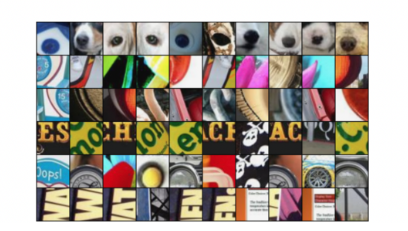

#### 구현방법
- 분석하고자 하는 특정 layer를 정함
- 예제 데이터를 backborn net에 넣어 각 레이어의 activation을 뽑음
- 분석하고자 했던 채널을 저장
- 저장된 채널의 activation에서 가장 큰 값을 갖는 위치를 파악
- 입력도메인과 4번째의 위치가 같은 곳의 receptivefild를 계산 -> 해당 patch를 뜯어옴

### Activation Investigation3

- 예제 데이터를 사용하지 않고 네트워크에 내재되어 있는 정보를 시각화하는 방법
- 학습된 데이터를 기반으로 추론
- gradient ascent를 통해 얻을 수 있음

#### 구현방법
- 임의의 영상을 분석하고자 하는 CNN모델에 넣어줌
- 관심 class score을 출력
- backpropadation을 통해서 입력단의 gradiant를 구함
- target score을 높여주는 방향으로 input 이미지를 업데이트 (gradiant를 더해줌)
- 반복

# 3. Model decision explanation (결과분석)

## Saliency Test

- 이미지가 주어졌을 때, 그 이미지가 올바르게 분류되기 위한 각 영역의 중요도를 추출하는 방법

### (1) occlusion map 계산
- 이미지를 입력할 때 특정 부분을 occlusion patch로 가려준 상태로 입력 -> score 출력
- occlusion patch의 위치를 계속해서 변화해가며 score을 기록
- score에 따라 이미지를 예측할 때 어떤부분을 중요하게 보는지 직관적으로 파악
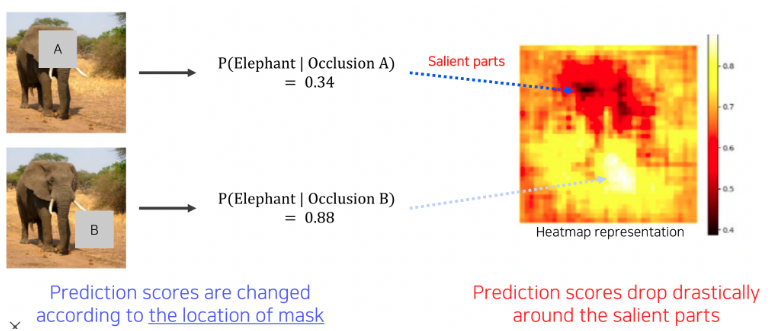

### (2) backpropagation 활용
- 특정 이미지를 분류하고, 그 예측 결과에 결정적으로 영향을 미친 부분이 어디인지 heatmap으로 시각화하는 방법

#### 구현방법
- 입력영상을 넣어 1개의 class score을 얻음
- backpropagation을 입력 도메인까지 수행
- loss를 조정해주는 gradiant값을 얻음
- 얻어진 gradiant 값에 절댓값을 취함 -> gradient를 시각화
    - gradient를 시각화 하는 이유 : 클수록 입력 이미지에서 해당 영역이 많이 바뀌어야 클래스 스코어가 올바른 방향으로 바뀐다고 볼 수 있기 때문

## Backpropagation-based saliency

- CNN에서는 일반적으로 ReLU를 activation 함수로 많이 활용
- ReLU를 사용할 때 forward pass에서 음수가 나온 부분은 0으로 마스킹, 패턴 저장
- backpropagation시 양수와 음수가 합쳐진 gradiant가 나타나면 이전의 음수 마스크로 저장이 되어있던 패턴으로 마스킹
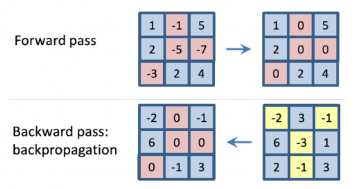


zeiler가 사용한 방법 
- forward시 ReLU를 사용하지 않음 (마스킹을 저장 x)
- backword시 음수를 0으로 마스킹
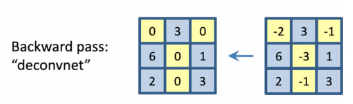


두 방식을 합치기
- forword, backword 모두 ReLU를 적용
- 두 과정에서 모두 음수의 값을 0으로 

=> 보통 사람이 입력 이미지를 분류할 때 중점적으로 바라보는 영역과 일치하는 saliency map을 보여주는 것을 확인

=> 두 과정에서 모두 ReLU 적용 시 양수의 gradient를 가지는 부분에 집중하여 시각화함으로써 이미지에서 클래스 분류에 도움이 되는 영역만 추출하는 효과를 얻음

## Class Activation Mapping (CAM)

- 모델의 예측 결과에 이미지의 어떤 영역이 중요한 역할을 했는지 heatmap의 형태로 시각화하는 방법

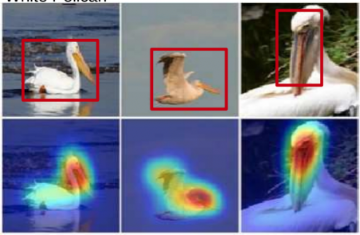

- neural network의 일부를 바꿔주어야 함
- Conv. layer에 최종적으로 출력된 feature map을 바로 FC layer에 통과시키지 않고, 그 이전에 GAP(Global Average Pooling)을 수행해주도록 변경
- FC layer를 하나만 통과하도록
- image classification에 대해서 다시 학습
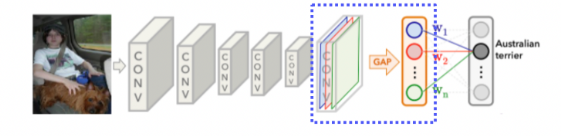

pretraind된 Network로 부터 CAM 유도
- class c에 대한 score S는 GAP 이후 마지막 FC layer에서 클레스에 해당하는 weight들 그리고 GAP feature와의 선형 결합 연산을 통해 구할 수 있음
- 이때 GAP feature는 모든 픽셀에 대한 convolution feature map을 채널 축으로 average한 결과
- 이때 최하단 좌측의 수식은 모두 선형 연산이기 때문에 항의 순서를 바꿔줄 수 있음
- 이에 따라 우측과 같이 표현했을 때 시그마 안쪽항을 CAM(x,y)로 정의
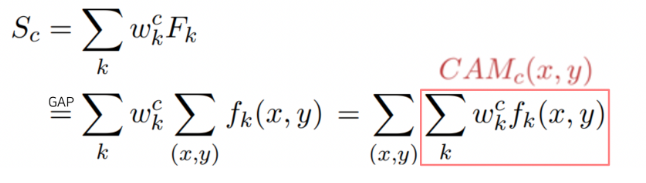

- CAM을 시각화해보면 위와 같은 결과를 얻을 수 있음
- 사람의 직관에 일치하는 결과
- 공간정보를 주지않았지만 위치 정보까지 어느정도 파악할 수 있도록 학습이 되었다고 볼 수 있음
- 물체의 위치 파악과 같은 보다 정교한 task를 image classification과 같은 rough한 task로 간접적으로 학습시키는 방식을 weakly-supervised learning이라고 부름
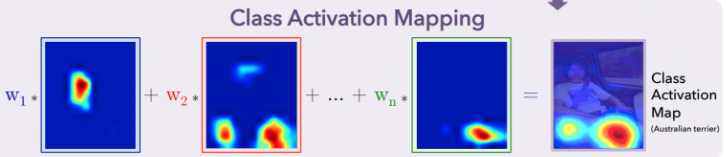

단점
- 마지막 layer 구성이 GAP 과 FC layer여야만 한다
- 재 학습이 필요하다
- 성능이 바뀔 수 있음

### Grad-CAM
- 기존 네트워크의 구조를 바꿀 필요도 없고 따라서 재학습하지 않고도 CAM을 확인할 수 있는 방법
- CAM과 비슷한 성능
- CAM과 동일하게 모델이 예측을 수행할 때 어떤 부분에 집중하고 있는지 시각화
- 기존 pretraind된 Net을 변경하지 않고 구할 수 있어서 어떤 task던 적용 가능(backborn이 CNN이기만 하다면)
- CAM의 경우 convolution layer의 feature map을 마지막 FC layer의 weight를 바탕으로 가중합을 수행함으로써 계산
- Grad-CAM에서 weight를 구하는 방법을 찾는것이 핵심
- guided backpropagation 방법과 결합하여 Guided Grad-CAM 결과를 확인할 수 있음

@ weight를 구하기 
1. 관심있는 activation layer까지만 backpropagation을 수행
2. 현재 task에서 해석하고 싶은 결과 y를 변화시키는 loss로 부터 backpropagation loss를 구하고 공간 축으로 GAP을 수행하여 각 채널의 gradient 성분의 크기(alpha)를 계산
3. 이 weight alpha를 activation map과 선형 결합한 후에 ReLU layer를 통과 양수값만을 활용해 계산
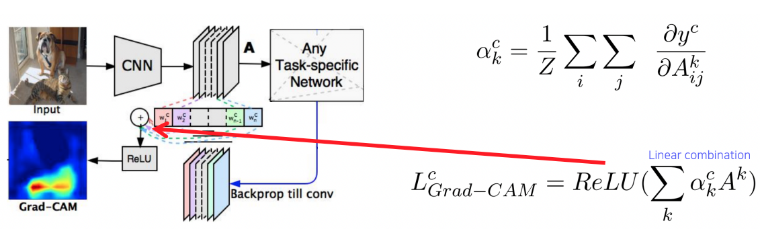